In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\housing.csv~\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Handle missing values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Encode categorical data
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
print("Encoded Data:\n", df.head())


Encoded Data:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                     

In [9]:
# Split the dataset into features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split the data into 80% training and 20% test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 12)
X_test shape: (4128, 12)
y_train shape: (16512,)
y_test shape: (4128,)


In [10]:
# Standardize the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of X_train_scaled:\n", X_train_scaled[:5])
print("First 5 rows of X_test_scaled:\n", X_test_scaled[:5])


First 5 rows of X_train_scaled:
 [[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196   -0.68057418 -0.01556621 -0.35564565  2.62975816]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338 -0.68057418 -0.01556621 -0.35564565  2.62975816]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145 -0.68057418 -0.01556621 -0.35564565  2.62975816]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438 -0.68057418 -0.01556621 -0.35564565  2.62975816]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831  1.46934754 -0.01556621 -0.35564565 -0.3802631 ]]
First 5 rows of X_test_scaled:
 [[ 0.28534728  0.1951     -0.28632369 -0.52286157 -0.24701249 -0.03030109
  -0.37008673 -1.15508475  1.46934754 -0.01556621 -0.35564565 -0.3802631 ]
 [ 0.06097472 -0.23549054  0.11043502  0

In [11]:
# Perform Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict output for test dataset
y_pred_lr = lr.predict(X_test_scaled)

# Print RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)


Linear Regression RMSE: 70060.5218447352


In [12]:
# Perform Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict output for test dataset
y_pred_dt = dt.predict(X_test_scaled)

# Print RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Regression RMSE:", rmse_dt)


Decision Tree Regression RMSE: 69680.87772366851


In [13]:
# Perform Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict output for test dataset
y_pred_rf = rf.predict(X_test_scaled)

# Print RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regression RMSE:", rmse_rf)


Random Forest Regression RMSE: 49008.7892163409


Linear Regression with Median Income RMSE: 84209.01241414454


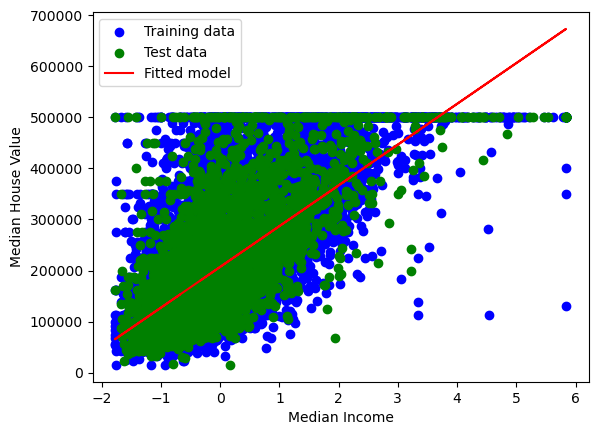

In [14]:
# Extract just the median_income column
X_train_median_income = X_train_scaled[:, X.columns.get_loc('median_income')]
X_test_median_income = X_test_scaled[:, X.columns.get_loc('median_income')]

X_train_median_income = X_train_median_income.reshape(-1, 1)
X_test_median_income = X_test_median_income.reshape(-1, 1)

# Perform Linear Regression
lr_single = LinearRegression()
lr_single.fit(X_train_median_income, y_train)

# Predict output for test dataset
y_pred_lr_single = lr_single.predict(X_test_median_income)

# Print RMSE
rmse_lr_single = np.sqrt(mean_squared_error(y_test, y_pred_lr_single))
print("Linear Regression with Median Income RMSE:", rmse_lr_single)

# Plot the results
plt.scatter(X_train_median_income, y_train, color='blue', label='Training data')
plt.scatter(X_test_median_income, y_test, color='green', label='Test data')
plt.plot(X_train_median_income, lr_single.predict(X_train_median_income), color='red', label='Fitted model')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()
